<a href="https://colab.research.google.com/github/marcos-willian00/Multiple-Linear-Regression/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/amsterdam_houses.csv')

print(data.describe())

       Unnamed: 0         Price        Area       Room         Lon  \
count  920.000000  9.200000e+02  920.000000  920.00000  920.000000   
mean   462.625000  6.220654e+05   95.607609    3.56413    4.888652   
std    266.924298  5.389942e+05   56.849699    1.57103    0.053118   
min      1.000000  1.750000e+05   21.000000    1.00000    4.644819   
25%    231.750000  3.500000e+05   60.000000    3.00000    4.855834   
50%    462.500000  4.670000e+05   83.000000    3.00000    4.886818   
75%    693.250000  7.000000e+05  113.000000    4.00000    4.922337   
max    924.000000  5.950000e+06  623.000000   14.00000    5.029122   

                Lat  
count    920.000000  
mean     222.906688  
std     2983.287625  
min       52.291519  
25%       52.352077  
50%       52.364631  
75%       52.377752  
max    52378.000000  


       Unnamed: 0         Price        Area       Room         Lon  \
count  920.000000  9.200000e+02  920.000000  920.00000  920.000000   
mean   462.625000  6.220654e+05   95.607609    3.56413    4.888652   
std    266.924298  5.389942e+05   56.849699    1.57103    0.053118   
min      1.000000  1.750000e+05   21.000000    1.00000    4.644819   
25%    231.750000  3.500000e+05   60.000000    3.00000    4.855834   
50%    462.500000  4.670000e+05   83.000000    3.00000    4.886818   
75%    693.250000  7.000000e+05  113.000000    4.00000    4.922337   
max    924.000000  5.950000e+06  623.000000   14.00000    5.029122   

                Lat  
count    920.000000  
mean     222.906688  
std     2983.287625  
min       52.291519  
25%       52.352077  
50%       52.364631  
75%       52.377752  
max    52378.000000  


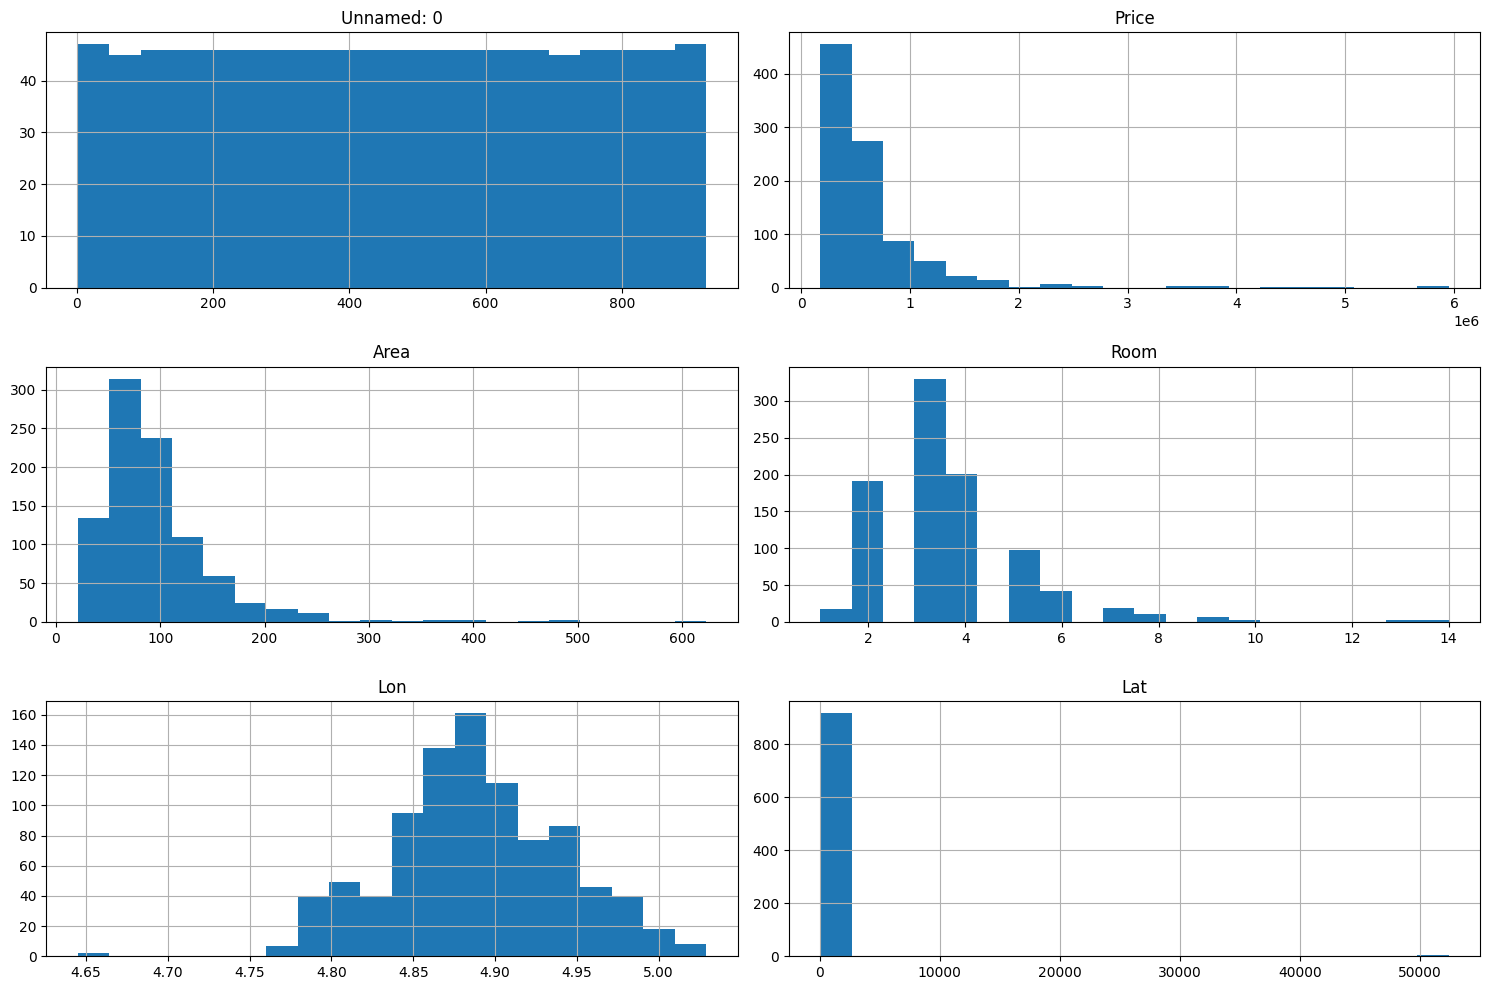

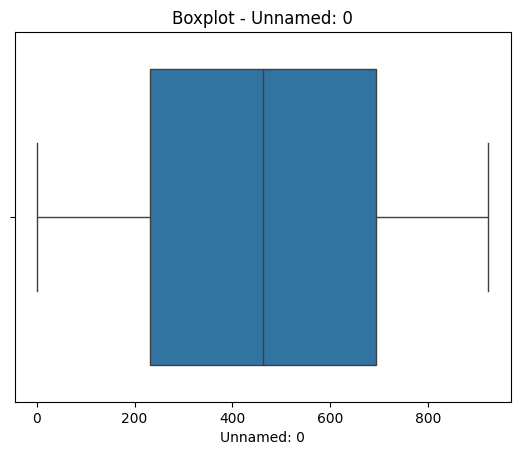

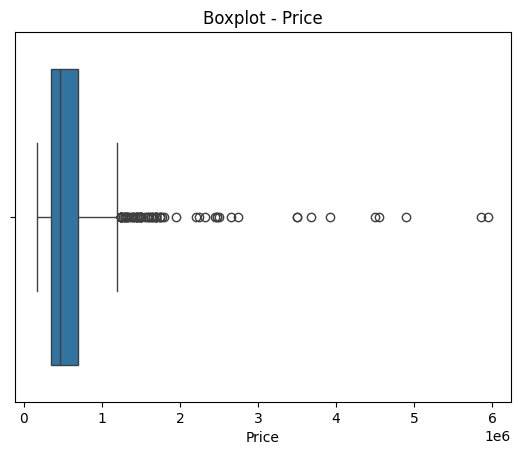

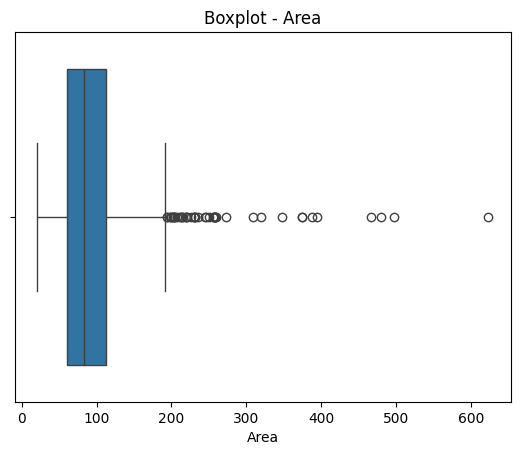

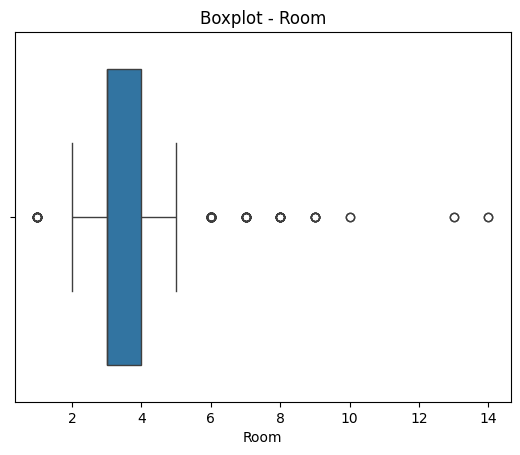

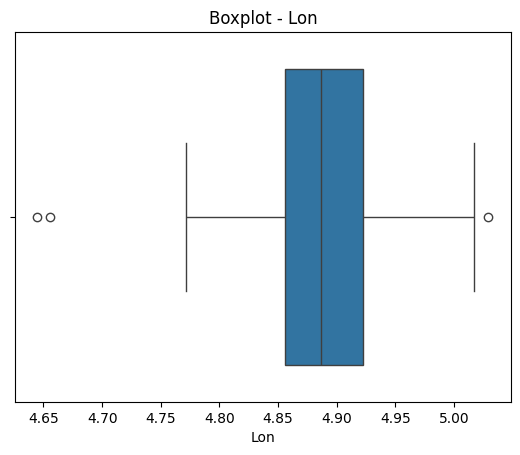

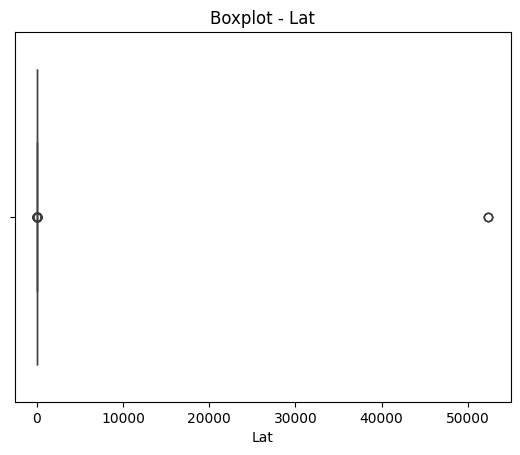

In [ ]:
# Descriptive statistics

print(data.describe())

# Histogram of numerical variables
data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplots to identify outliers
for column in data.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot - {column}')
    plt.show()


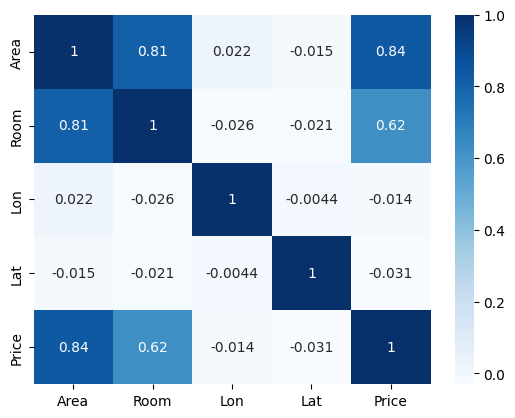

In [ ]:
# Correlation matrix

corr_matrix = data[['Area', 'Room', 'Lon', 'Lat', 'Price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="Blues")

plt.show()

In [ ]:
# Delimitation of variables

X = data[['Area', 'Room', 'Lon', 'Lat']].values
Y = data['Price'].values

# Data division

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(736, 4) (184, 4) (736,) (184,)


In [ ]:
class MultipleLinearRegression:
    def __init__(self):
        self.intercept = None
        self.coeficientes = None

    def fit(self, X, Y):
        X = np.column_stack((np.ones(X.shape[0]), X))
        X_transposta = X.T
        X_transposta_X = np.dot(X_transposta, X)
        X_transposta_Y = np.dot(X_transposta, Y)

        InversaX_transposta_X = np.linalg.inv(X_transposta_X)
        Betas = np.dot(InversaX_transposta_X, X_transposta_Y)

        self.intercept = Betas[0]
        self.coeficientes = Betas[1:]

    def predict(self, X):
        return self.intercept + np.dot(X, self.coeficientes)

    def mse(self, Y_true, Y_pred):
        return np.mean((Y_true - Y_pred)**2)

    def r_squared(self, Y_true, Y_pred):
        ss_residual = np.sum((Y_true - Y_pred)**2)
        ss_total = np.sum((Y_pred - np.mean(Y_true))**2)
        return 1 - (ss_residual / ss_total)

In [ ]:
# Model
model = MultipleLinearRegression()

model.fit(X_train, Y_train)

Y_previsto = model.predict(X_test)

# Calculation of metrics
MSE = model.mse(Y_test, Y_previsto)
RMSE = np.sqrt(MSE)
MAE = np.mean(np.abs(Y_test - Y_previsto))  # Adding MAE calculation
R_2 = model.r_squared(Y_test, Y_previsto)

print(f'MSE: {MSE:.2f}')
print(f'RMSE: {RMSE:.2f}')
print(f'MAE: {MAE:.2f}')
print(f'R²: {R_2:.4f}')

MSE: 61919522015.36
RMSE: 248836.34
MAE: 166763.34
R²: 0.7439


## **Interpretation of Results**

### **What is the impact of each variable on price forecasting?**

---



The model uses four variables to predict property prices: Area, Number of Bedrooms, Longitude, and Latitude.

The correlation matrix shows that Area has a high correlation with price—the larger the property, the higher the price. Latitude and longitude, on the other hand, indicate where the property is located. Depending on the region of Amsterdam, the price can rise or fall. The number of bedrooms also has an influence, but not as strongly as Area.

Therefore, Area is the most important factor in the model's predictions.

\

### **Is the model making good predictions? Why?**

---

The R² was 0.7739, so the model explains about 77% of the variation in house prices. This is quite reasonable for a simple model.

\

### **Is there overfitting or underfitting?**

---

There doesn't appear to be **overfitting** *(when the model gets it right too much in training and wrong in testing)*, nor does there appear to be **underfitting** *(when the model is too simplistic and doesn't learn well)*.

Even with test data, the model still had a decent R², which indicates that it generalizes relatively well.